# EDA

This Exploratory Data Analysis includes

1. Dataset preparation
2. Missing values
3. Variable types
4. Distribution of the numerical variables
5. Transformations
6. Outliers
7. Correlation

## 1. Dataset loading and preparation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from utils import (
    MyPlotGrid,
    print_distribution,
    my_distributions_view,
    split_dataset,
    data_preparation_pipe,
    global_pipeline_train,
    update_results,
)

In [3]:
df = pd.read_csv('../data/completion_rate.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031284 entries, 0 to 1031283
Data columns (total 50 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   form_id      1031284 non-null  int64  
 1   views        1031284 non-null  int64  
 2   submissions  1031284 non-null  int64  
 3   feat_01      1031284 non-null  float64
 4   feat_02      1031284 non-null  float64
 5   feat_03      1031284 non-null  float64
 6   feat_04      1031284 non-null  float64
 7   feat_05      1031284 non-null  float64
 8   feat_06      1031284 non-null  float64
 9   feat_07      1031284 non-null  float64
 10  feat_08      1031284 non-null  float64
 11  feat_09      1031284 non-null  float64
 12  feat_10      1031284 non-null  float64
 13  feat_11      1031284 non-null  float64
 14  feat_12      1031284 non-null  float64
 15  feat_13      1031284 non-null  float64
 16  feat_14      1031284 non-null  float64
 17  feat_15      1031284 non-null  float64
 18  fe

In [5]:
df.head()

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
0,1113027,33,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,1115313,147,111,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1115907,528,136,0.0,1.0,0.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.0
3,1116299,55,21,0.0,2.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
4,1120373,62,54,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.0,7.0,21.0


In [6]:
df.columns

Index(['form_id', 'views', 'submissions', 'feat_01', 'feat_02', 'feat_03',
       'feat_04', 'feat_05', 'feat_06', 'feat_07', 'feat_08', 'feat_09',
       'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14', 'feat_15',
       'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_20', 'feat_21',
       'feat_22', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_27',
       'feat_28', 'feat_29', 'feat_30', 'feat_31', 'feat_32', 'feat_33',
       'feat_34', 'feat_35', 'feat_36', 'feat_37', 'feat_38', 'feat_39',
       'feat_40', 'feat_41', 'feat_42', 'feat_43', 'feat_44', 'feat_45',
       'feat_46', 'feat_47'],
      dtype='object')

Let's add the target column and remove unwanted columns from the dataset

In [7]:
df['completion_ratio'] = df['submissions']/df['views']
selected_columns = list(df.columns)
selected_columns.pop(selected_columns.index('form_id'))
selected_columns.pop(selected_columns.index('views'))
selected_columns.pop(selected_columns.index('submissions'))
df = df.loc[:,selected_columns]

In [8]:
target_name = 'completion_ratio'
features = list(df.columns)
_  = features.pop(features.index(target_name))

Let's sample the dataset for the analysis to finish on time

In [9]:
df_original = df.copy()
print("original dataset length",len(df_original))
df = df_original.sample(frac=0.1)
print("sampled dataset length",len(df))

original dataset length 1031284
sampled dataset length 103128


## 2. Missing data
No missing data found

In [10]:
# missing data?
print(len(df))
df.info()

103128
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103128 entries, 588027 to 94612
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   feat_01           103128 non-null  float64
 1   feat_02           103128 non-null  float64
 2   feat_03           103128 non-null  float64
 3   feat_04           103128 non-null  float64
 4   feat_05           103128 non-null  float64
 5   feat_06           103128 non-null  float64
 6   feat_07           103128 non-null  float64
 7   feat_08           103128 non-null  float64
 8   feat_09           103128 non-null  float64
 9   feat_10           103128 non-null  float64
 10  feat_11           103128 non-null  float64
 11  feat_12           103128 non-null  float64
 12  feat_13           103128 non-null  float64
 13  feat_14           103128 non-null  float64
 14  feat_15           103128 non-null  float64
 15  feat_16           103128 non-null  float64
 16  feat_17  

In [84]:
# Verification of missing data not present in the dataset
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
df[vars_with_na].isnull().mean()

Series([], dtype: float64)

## 3. Variable types

We have only numerical variables in the dataset by inspecting the output of df.info(). We have already removed uninformative Id columns. Let's verify it

In [85]:
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  48


,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,feat_08,feat_09,feat_10,...,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,completion_ratio
65513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.833333
960935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.452830
200058,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.769231
494937,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.586207
382834,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,10.0,0.534338


All variables seem to be numeric and continuous. No discrete or Date time variables are found by inspecting the describe()

In [86]:
df.describe()

,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,feat_08,feat_09,feat_10,...,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,completion_ratio
count,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,...,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000,103128.000000
mean,0.196755,0.375950,0.052459,0.001047,0.145441,0.177779,0.847180,0.095832,0.659258,0.013275,...,0.058490,0.195679,0.149843,0.278625,0.341702,0.048706,0.813785,0.622838,4.434441,0.514439
std,0.397548,0.926545,0.411612,0.032344,0.474913,0.948163,1.845065,0.310834,1.305908,0.127742,...,0.387425,1.131742,0.675705,0.564152,0.611367,0.299724,3.834674,4.661343,10.334060,0.223639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000177
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.528302
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.684211
max,1.000000,51.000000,50.000000,1.000000,38.000000,71.000000,76.000000,11.000000,165.000000,5.000000,...,21.000000,61.000000,38.000000,38.000000,38.000000,38.000000,357.000000,471.000000,478.000000,1.000000


Let's do a quick verification (due to the high number of columns)

In [87]:
discrete_vars = []
for var in df.columns:
    #print(var,len(df[var].unique()))
    if len(df[var].unique()) == len(df):
        print("found id or continuous var",var)
    elif df[var].dtypes == 'int64' and len(df[var].unique()) < 20:
        print("found possible discrete var",var)
        discrete_vars.append(var)
    elif len(df[var].unique()) < 20:
        print("found possible discrete var with misleading type",var, len(df[var].unique()))
        discrete_vars.append(var)
        
continuous_vars = [ col for col in df.columns if col not in discrete_vars]
print("\ndiscrete vars", discrete_vars)
print("\ncontinuous vars", continuous_vars)


found possible discrete var with misleading type feat_01 2
found possible discrete var with misleading type feat_04 2
found possible discrete var with misleading type feat_08 10
found possible discrete var with misleading type feat_10 6
found possible discrete var with misleading type feat_11 17
found possible discrete var with misleading type feat_12 18
found possible discrete var with misleading type feat_13 10
found possible discrete var with misleading type feat_15 6
found possible discrete var with misleading type feat_18 19
found possible discrete var with misleading type feat_20 2
found possible discrete var with misleading type feat_24 16
found possible discrete var with misleading type feat_26 19
found possible discrete var with misleading type feat_31 11
found possible discrete var with misleading type feat_32 15
found possible discrete var with misleading type feat_35 10
found possible discrete var with misleading type feat_39 19
found possible discrete var with misleading t

## 4. Discrete vars

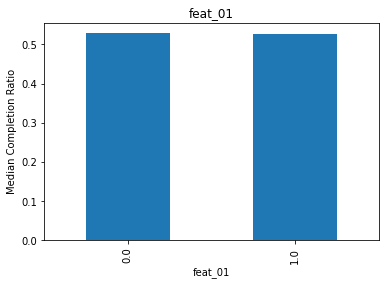

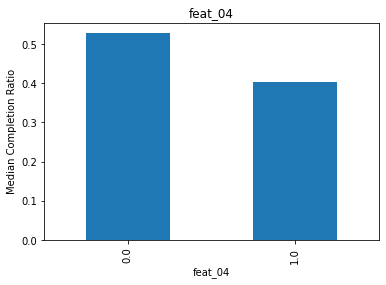

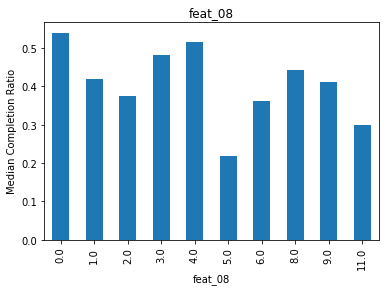

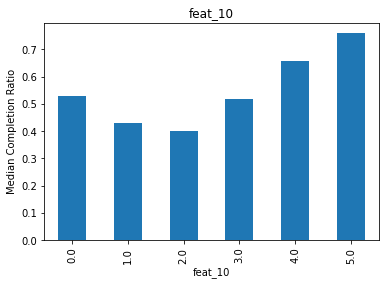

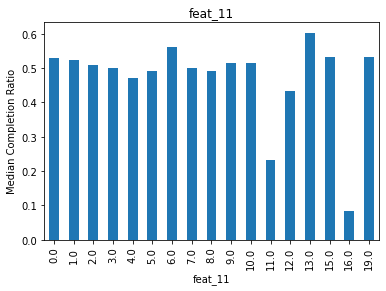

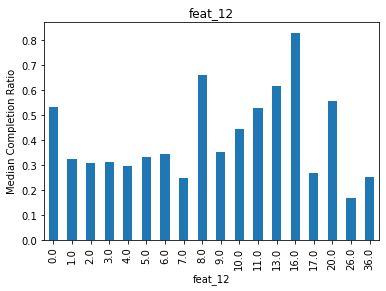

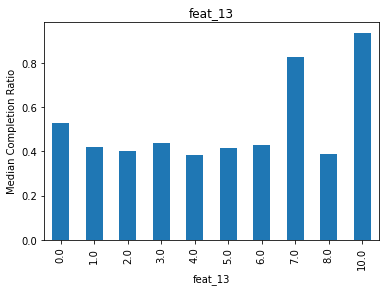

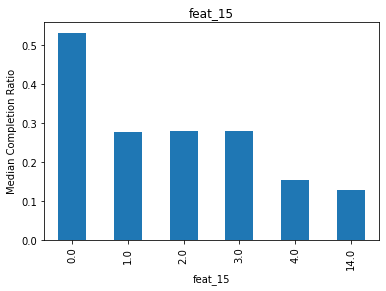

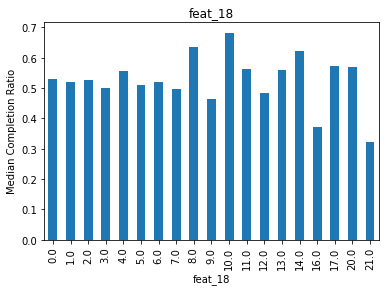

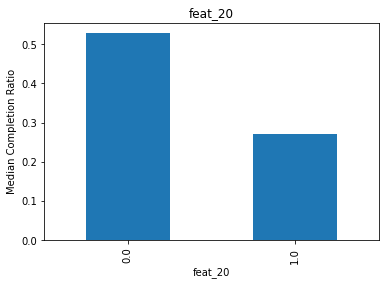

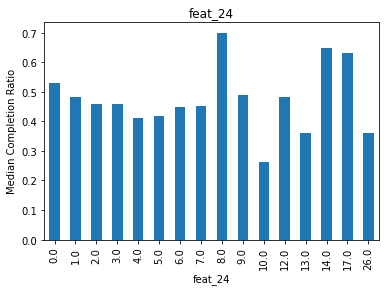

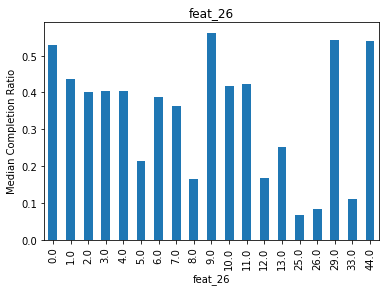

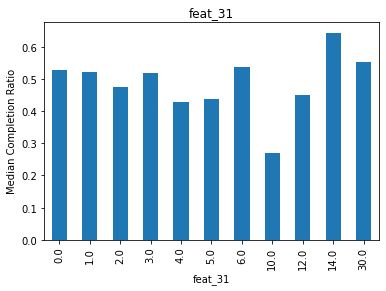

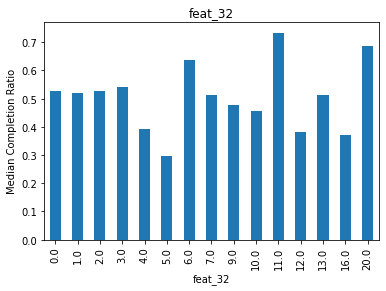

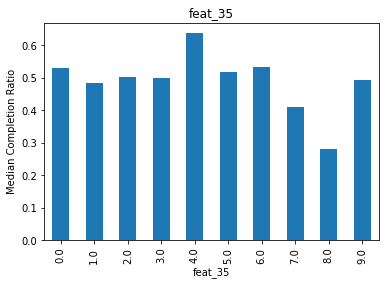

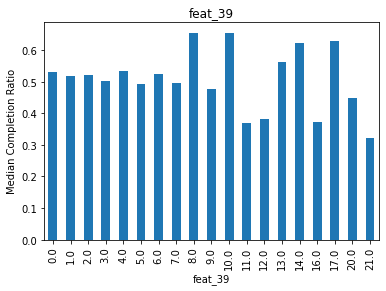

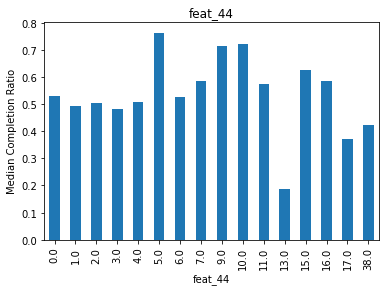

In [88]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)[target_name].median().plot.bar()
    plt.title(var)
    plt.ylabel('Median Completion Ratio')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(df, var)

## 4. Distribution of the numerical types

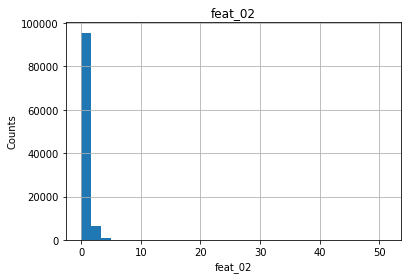

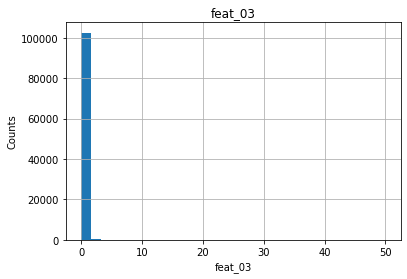

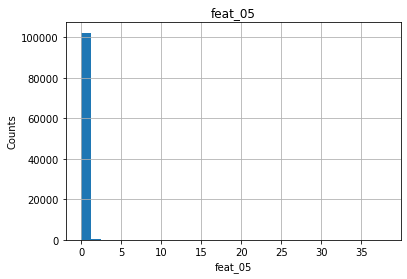

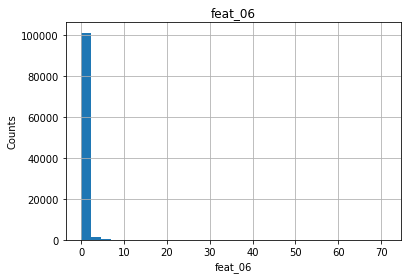

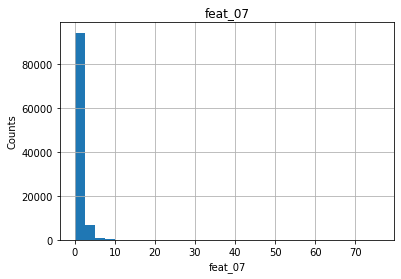

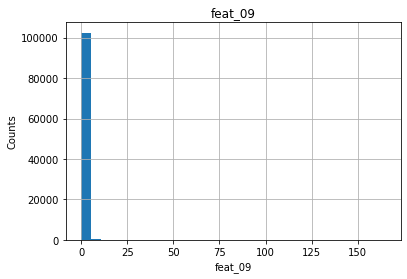

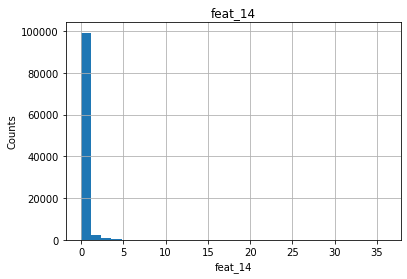

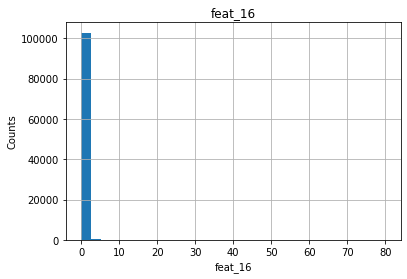

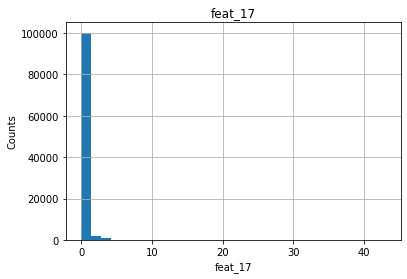

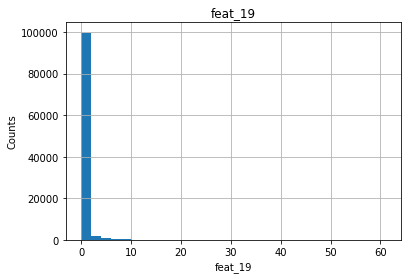

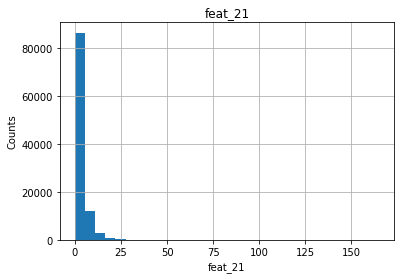

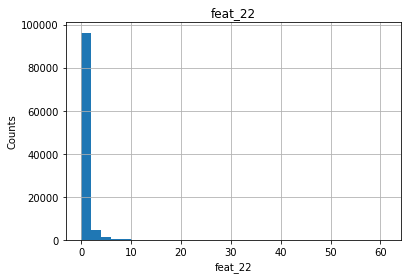

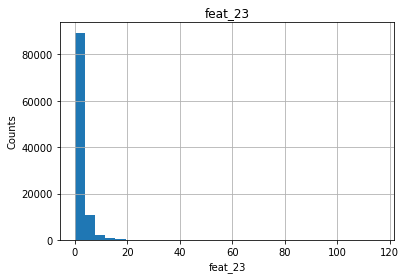

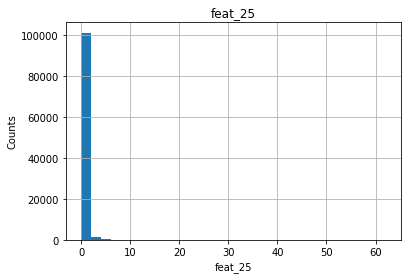

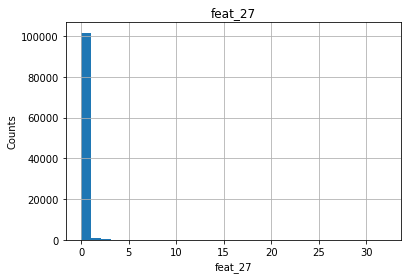

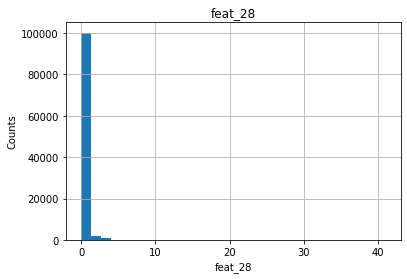

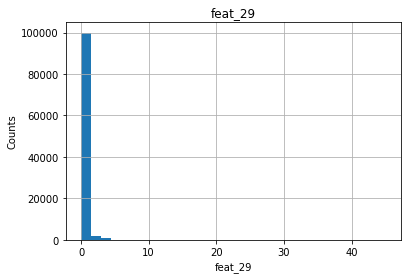

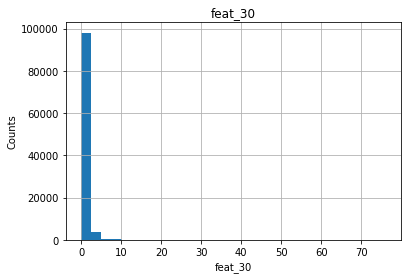

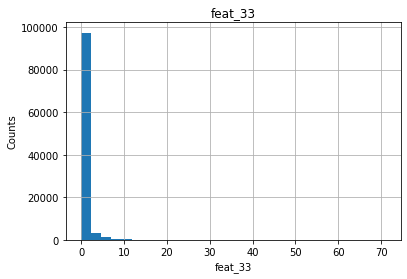

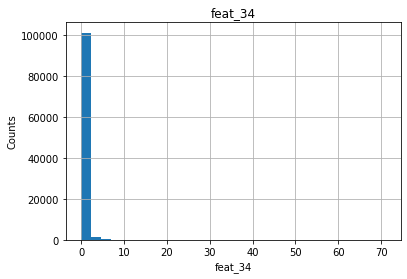

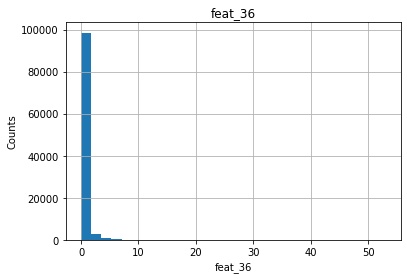

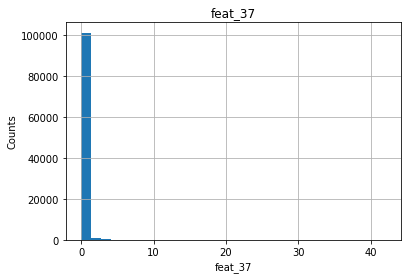

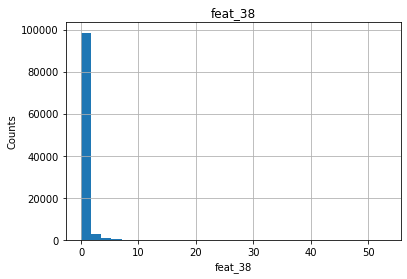

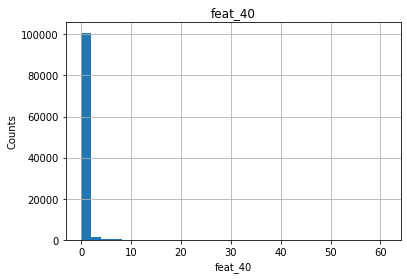

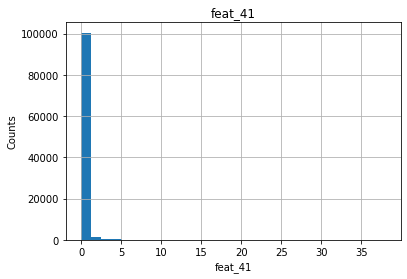

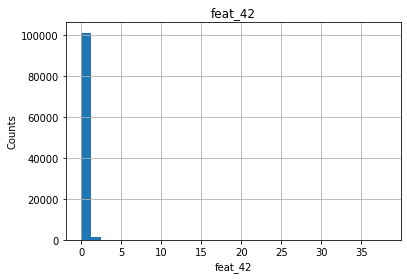

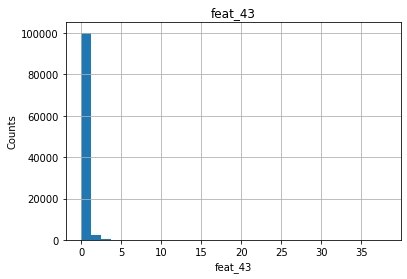

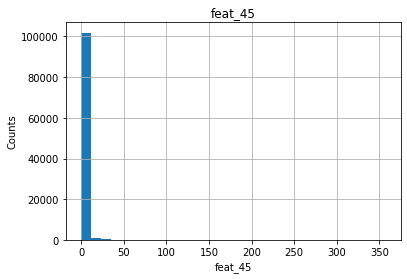

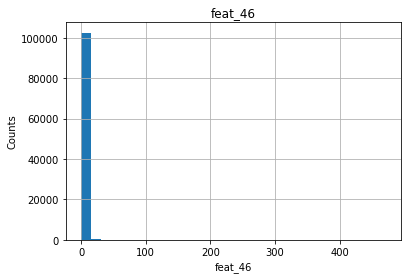

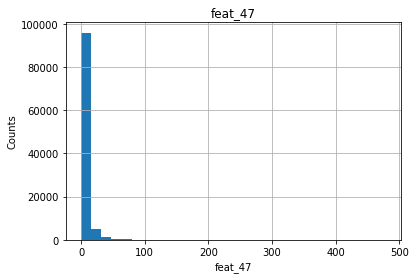

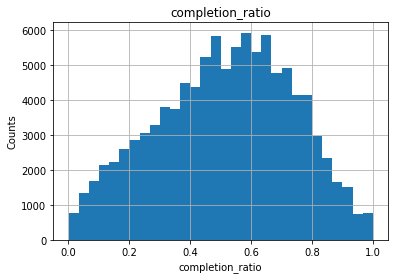

In [89]:

def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Counts')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in continuous_vars:
    analyse_continuous(df, var)

To summarize, let's plot the distribution of each variable with its box plot and the scatter plot with the target

num rows 3 num cols 3  total 9


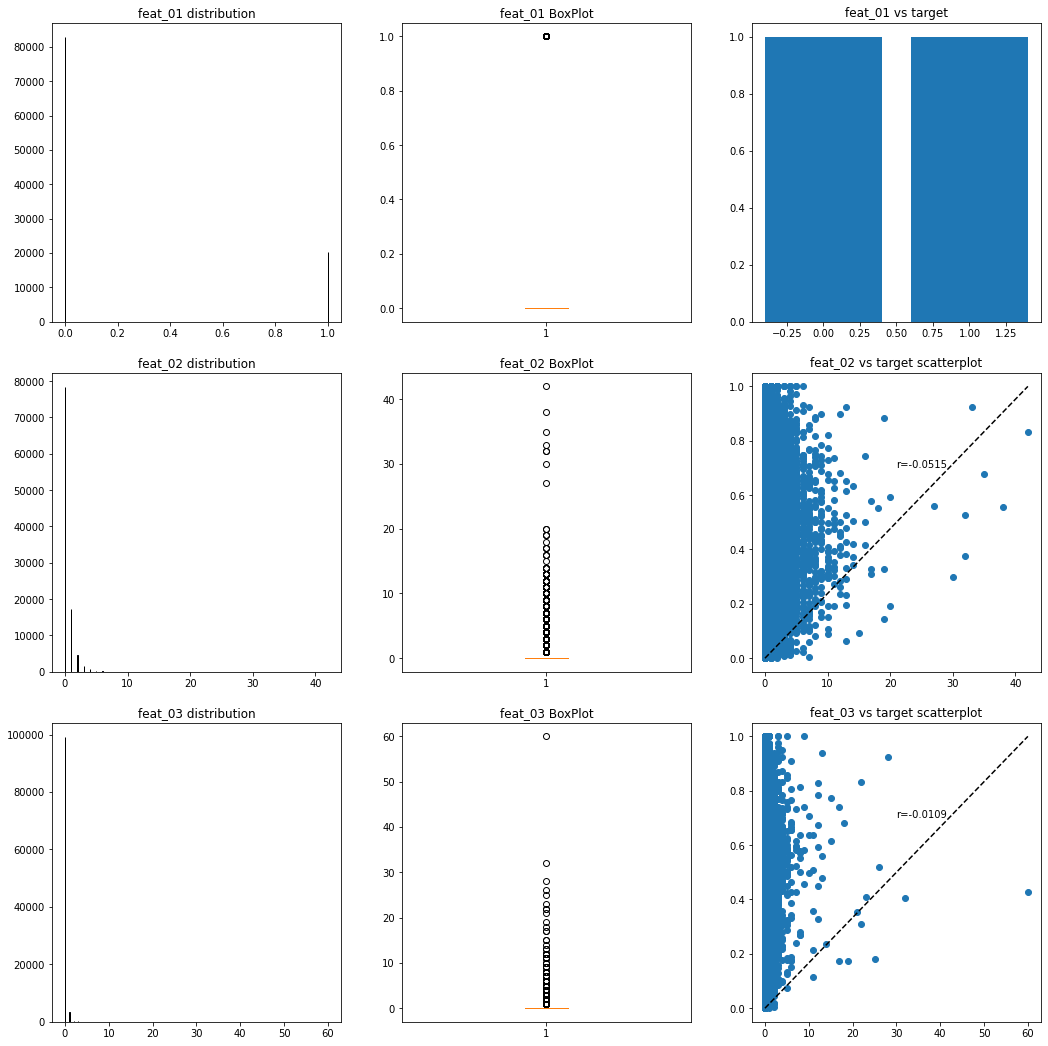

In [18]:
from scipy.stats import pearsonr

plot_grid = MyPlotGrid(
        ncols=3, total_plots=len(df.columns)*3, figsize=(15,150)
    )


plot_grid = MyPlotGrid(
        ncols=3, total_plots=3*3, figsize=(15,15)
    )

plot_grid_iter = iter(plot_grid)
for feat in list(df.columns)[:3]: 
 
    # distribution plot 
    plot_axis = next(plot_grid_iter)
    bins = int(len(df[feat]) * 0.01)
    plot_axis.hist(df[feat], color="blue", edgecolor="black", bins=bins)
    plot_axis.set_title(feat+" distribution")
    
    
    # plot box plot 
    plot_axis = next(plot_grid_iter)
    if feat in discrete_vars:
        pass
    else:
        plot_axis.set_title(feat+' BoxPlot')
        plot_axis.boxplot(df[feat]) 

    
    # scatter plot with target var
    plot_axis = next(plot_grid_iter)
    if feat in discrete_vars:
        plot_axis.bar(df[feat], df[target_name])
        plot_axis.set_title(feat+" vs target")
    else:
        # compute correlation with target var 
        corr, _ = pearsonr(df[feat], df[target_name])
        r = round(corr,4)
        # plot scatterplot
        plot_axis.scatter(df[feat], df[target_name])
        plot_axis.set_title(feat+" vs target scatterplot")
        plot_axis.plot([min(df[feat]), max(df[feat])], [0, 1], '--k')
        plot_axis.text(min(df[feat]) + 0.5*(max(df[feat]) - min(df[feat])), 0.7, "r={}".format(r))


    


## 5. Transformations

None of the features or target in the dataset are normally distributed. Let's try to apply different transformations.

In [90]:
log_transformable = [var for var in df.columns if all(df[var])>0 ]
print(" How many vars accept a log transform?",
     len(
         log_transformable
     ))   
log_transformable

 How many vars accept a log transform? 1


['completion_ratio']

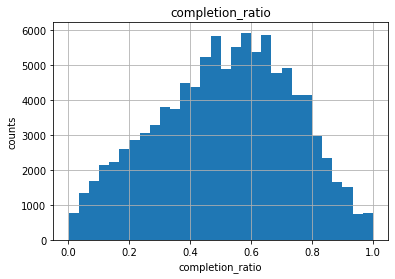

In [91]:
df[target_name].hist(bins=30)
plt.ylabel('counts')
plt.xlabel(var)
plt.title(var)
plt.show()

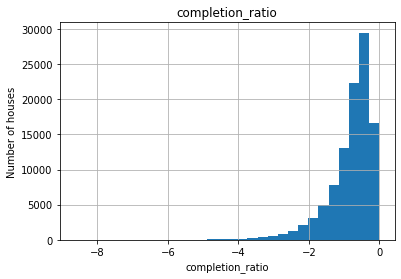

In [92]:
def analyse_transformed_continuous(df, var):
    df = df.copy()

    if any(df[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
        
for var in df.columns:
    analyse_transformed_continuous(df,var)

This is not a good transformation. Let's try other transformations avaiblable like Box-Cox and the Quantile transform

First let's transform the target with the Box-Cox transforms and see it's distribution and outliers

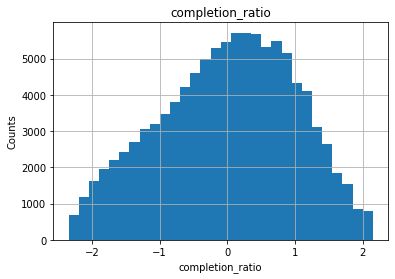

In [93]:
from sklearn import preprocessing

pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)

df2 = df.copy()
df2[target_name] = pt.fit_transform(df2[target_name].to_numpy().reshape(-1,1))
df2[target_name].hist(bins=30)
plt.ylabel('Counts')
plt.xlabel(var)
plt.title(var)
plt.show()    


Seconds, let's transform the target with the Quantile transformer and see it's distribution and outliers

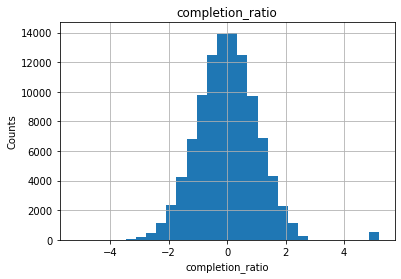

In [94]:
from sklearn import preprocessing

quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)
df2 = df.copy()
df2[target_name] = quantile_transformer.fit_transform(df2[target_name].to_numpy().reshape(-1,1))
df2[target_name].hist(bins=30)
plt.ylabel('Counts')
plt.xlabel(var)
plt.title(var)
plt.show()

The final decision is to use the traget variable with the Quantile Transform. 

In [95]:
df[target_name] = df2[target_name]

Now Let's apply some scaling transform.
First we start by the Standard scaling.

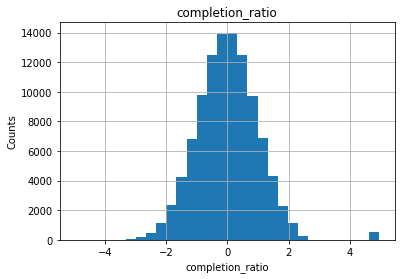

In [96]:
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(df2[target_name].to_numpy().reshape(-1,1)) 

# transform the train and test set
df[target_name+'_scaled'] = scaler.transform(df2[target_name].to_numpy().reshape(-1,1))

df[target_name+'_scaled'].hist(bins=30)
plt.ylabel('Counts')
plt.xlabel(var)
plt.title(var)
plt.show()

Then we test the MaxMin Scaling

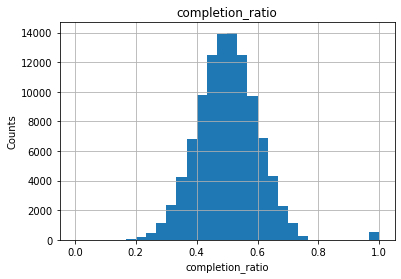

In [97]:
from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(df2[target_name].to_numpy().reshape(-1,1)) 

# transform the train and test set
df[target_name+'_minmax'] = scaler.transform(df2[target_name].to_numpy().reshape(-1,1))

df[target_name+'_minmax'].hist(bins=30)
plt.ylabel('Counts')
plt.xlabel(var)
plt.title(var)
plt.show()

We don't have to use any scaling after the quantile transform.

In [98]:
df.drop(columns=[target_name+'_minmax',target_name+'_scaled'], inplace=True)
df.columns

Index(['feat_01', 'feat_02', 'feat_03', 'feat_04', 'feat_05', 'feat_06',
       'feat_07', 'feat_08', 'feat_09', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'completion_ratio'],
      dtype='object')

Now let's focus on the continuous features. Can we apply any transform?

In [99]:
for var in continuous_vars:
    if all(df[var]>0):
        print("we can transform ",var)
        

Then let's try to apply the Quantile transform to the other variables, removing the ones that appear to be discrete.

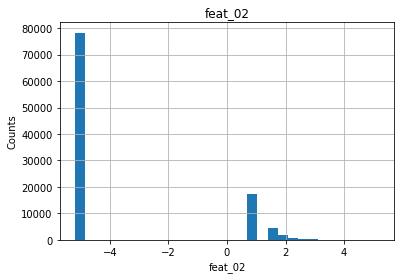

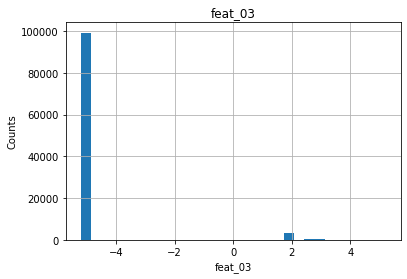

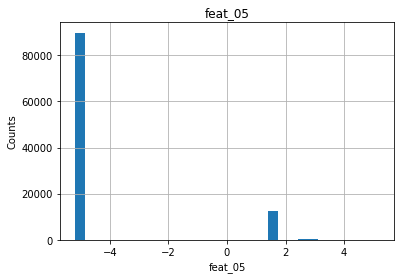

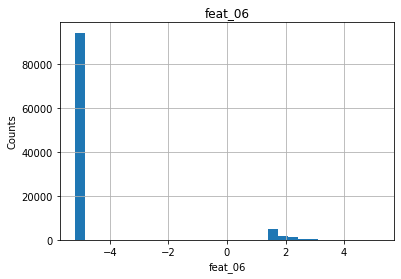

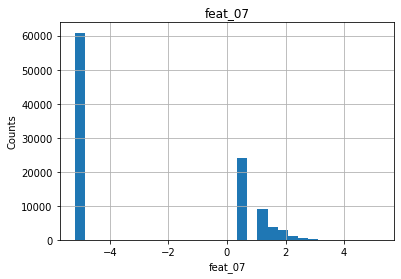

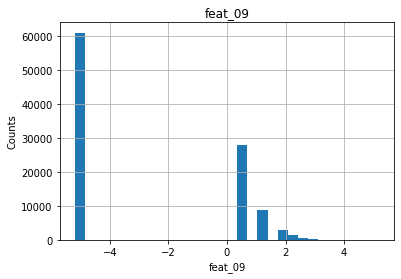

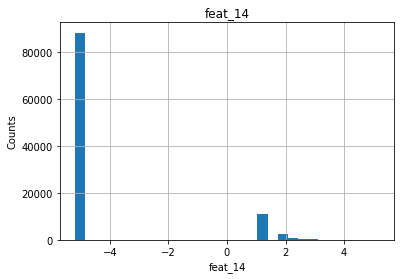

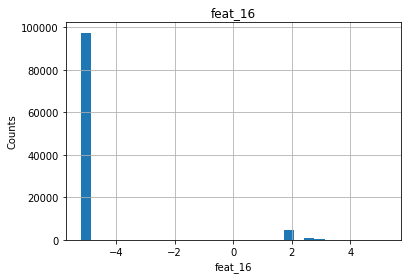

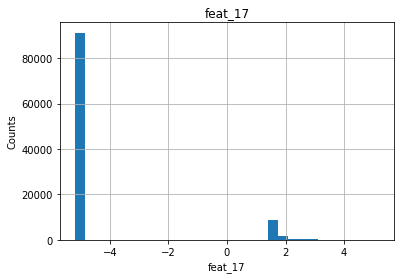

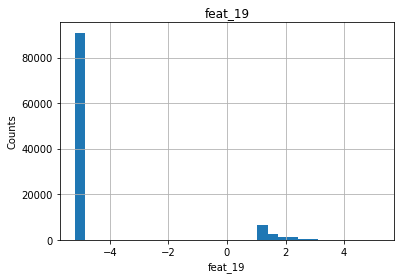

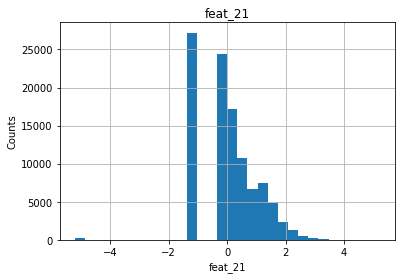

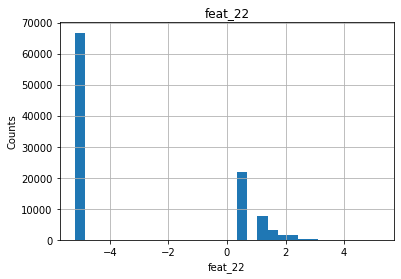

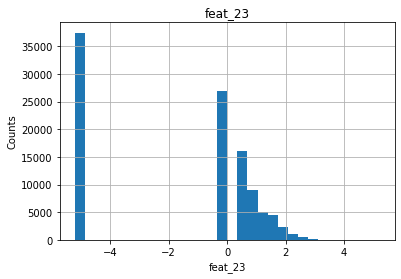

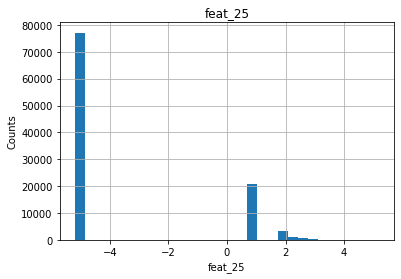

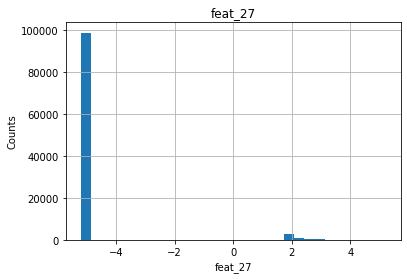

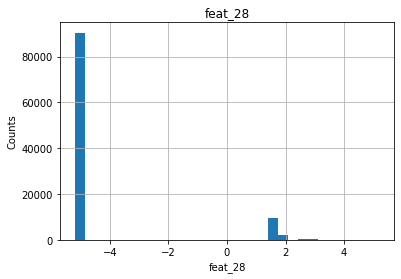

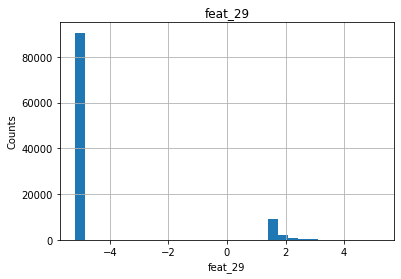

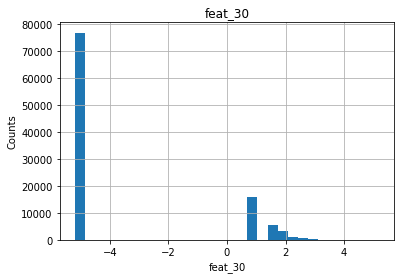

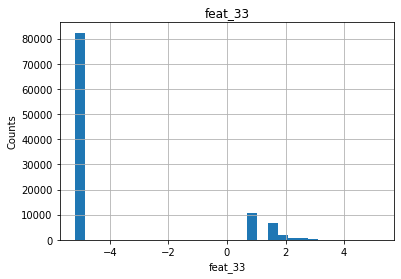

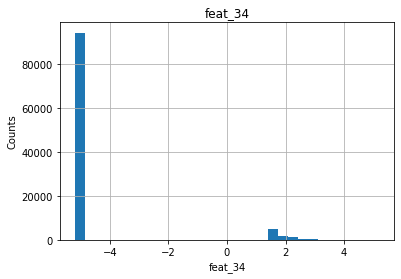

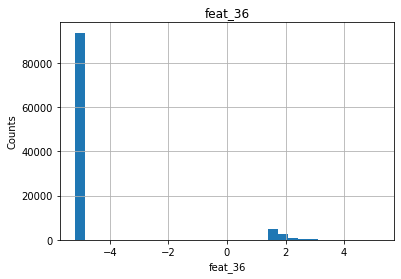

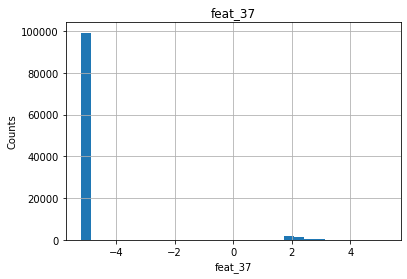

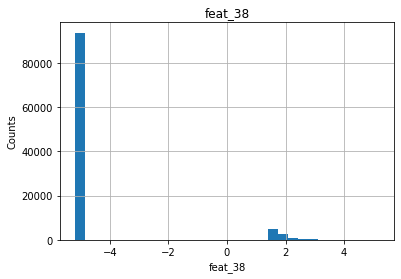

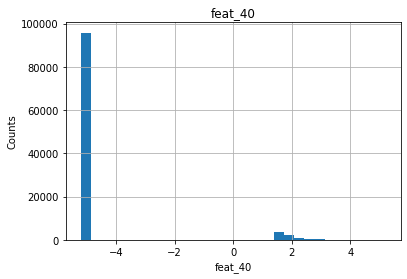

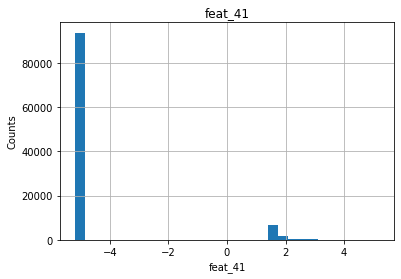

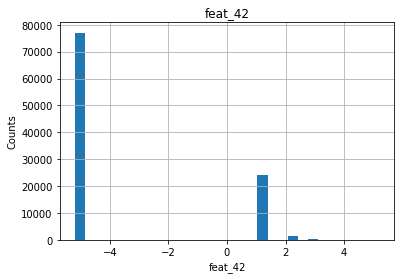

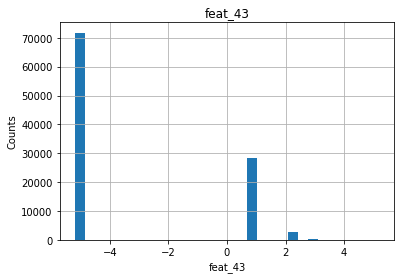

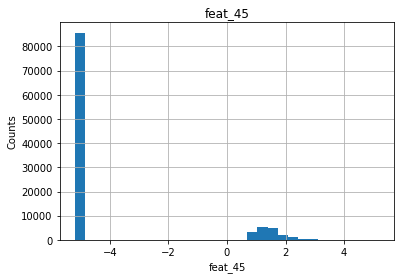

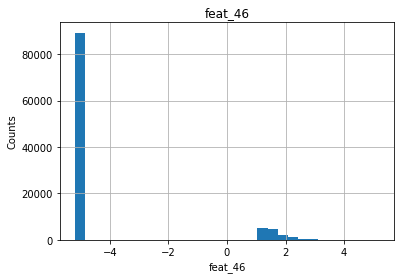

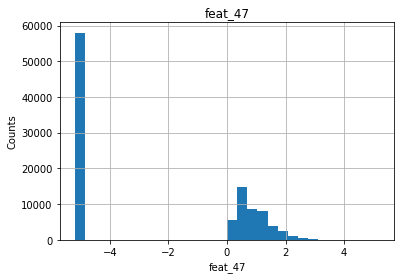

In [100]:
def test_quantile_transform(df,var):
    quantile_transformer = preprocessing.QuantileTransformer(
        output_distribution='normal', random_state=0)
    df2 = df.copy()
    df2[var] = quantile_transformer.fit_transform(df2[var].to_numpy().reshape(-1,1))
    df2[var].hist(bins=30)
    plt.ylabel('Counts')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in continuous_vars:
    if var == target_name:
        continue
    test_quantile_transform(df,var)

Now let's apply the Standard Scaler

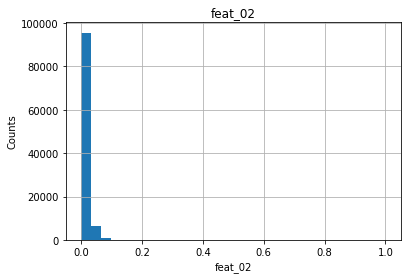

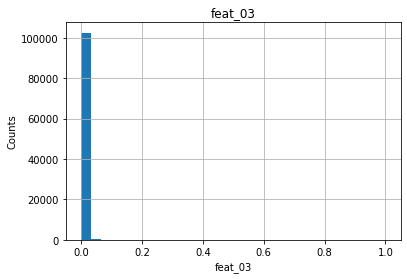

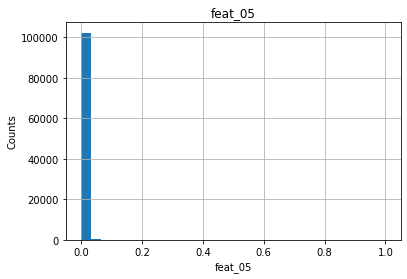

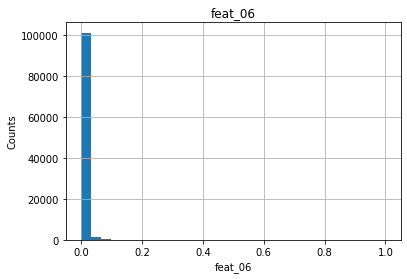

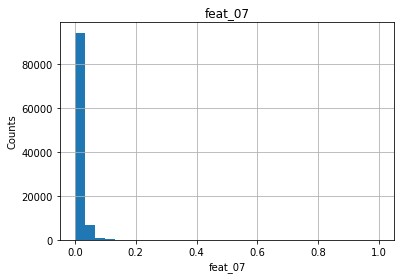

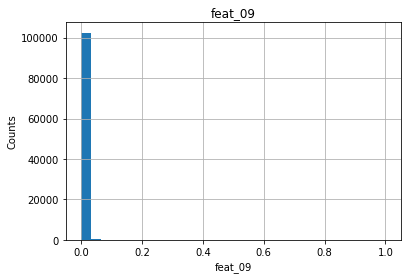

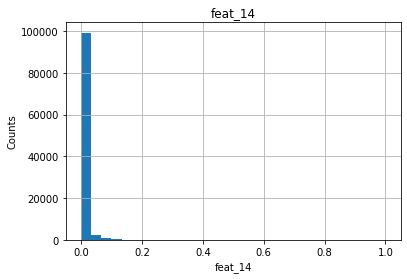

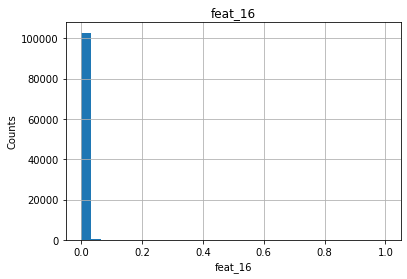

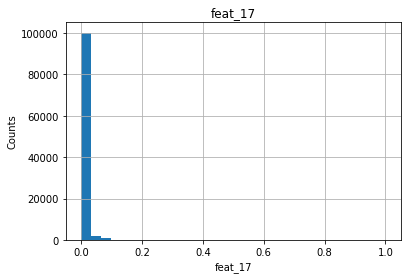

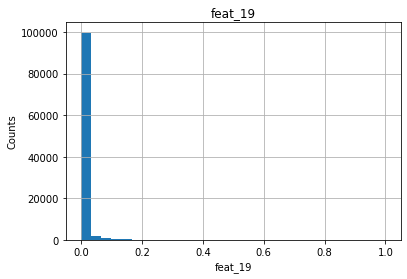

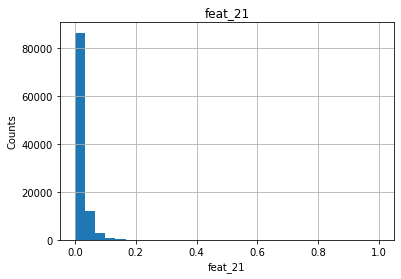

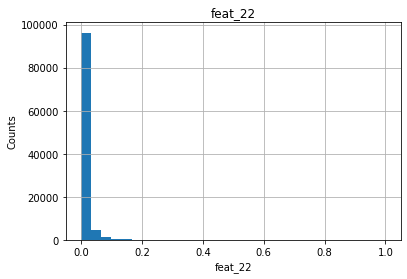

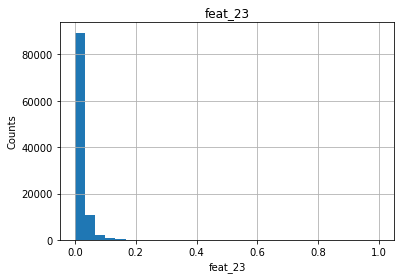

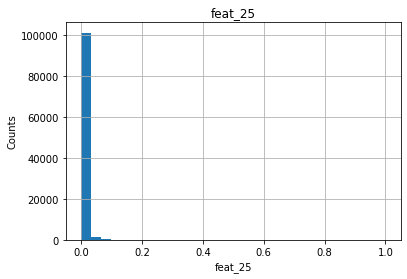

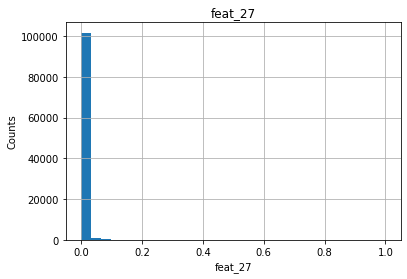

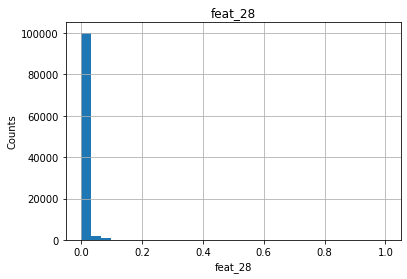

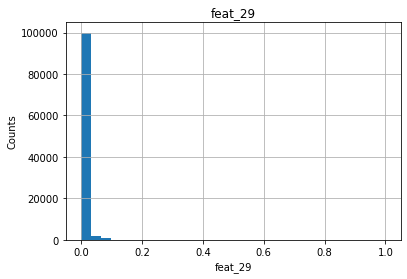

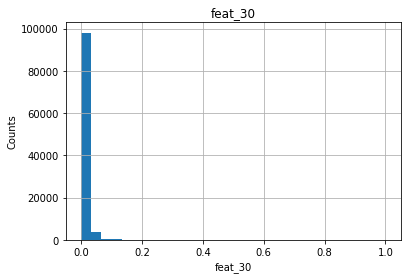

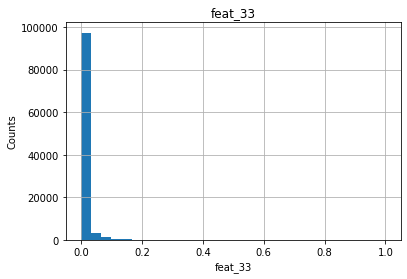

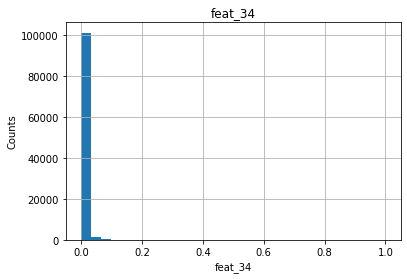

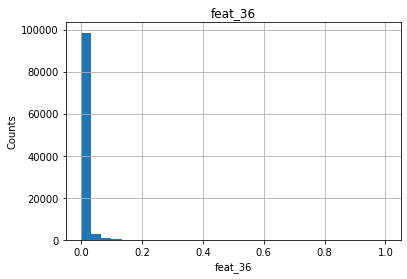

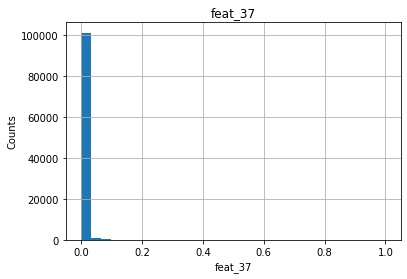

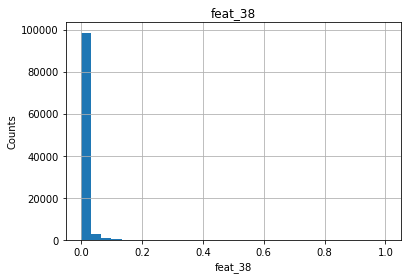

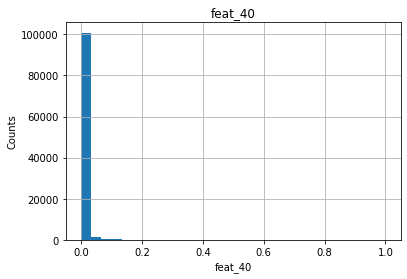

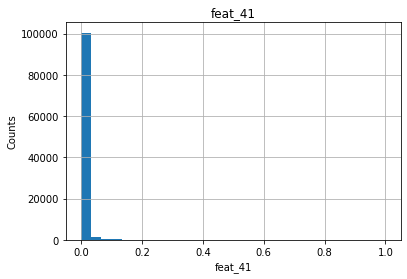

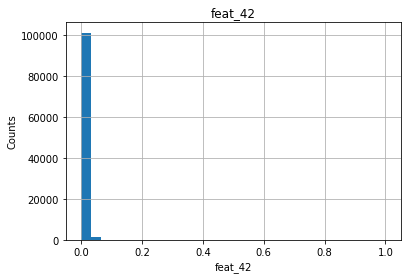

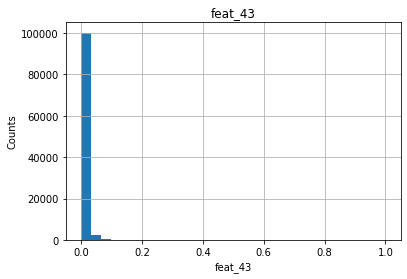

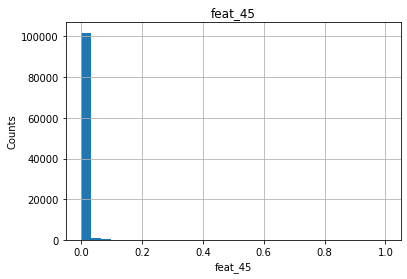

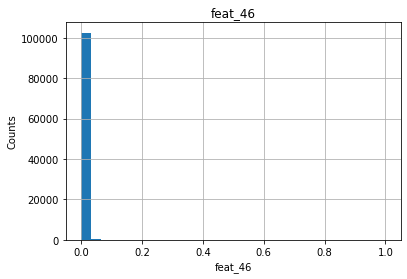

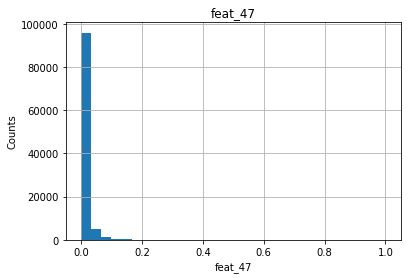

In [101]:
def test_minmax_scaler(df,var):
    df2 = df.copy()
    
    # create scaler
    scaler = MinMaxScaler()

    #  fit  the scaler to the train set
    scaler.fit(df2[var].to_numpy().reshape(-1,1)) 

    # transform the train and test set
    df2[var] = scaler.transform(df2[var].to_numpy().reshape(-1,1))

    df2[var].hist(bins=30)
    plt.ylabel('Counts')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in continuous_vars:
    if var == target_name:
        continue
    test_minmax_scaler(df,var)

Now let's try the MaxMin Scaler

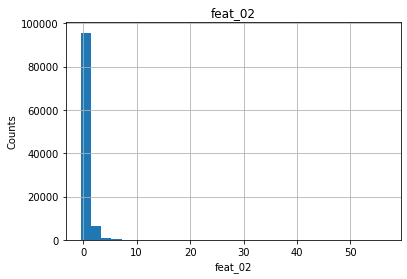

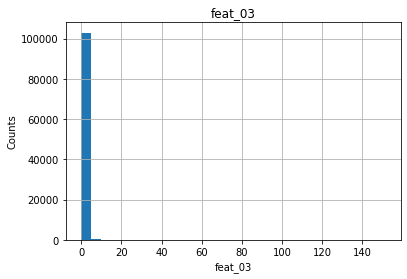

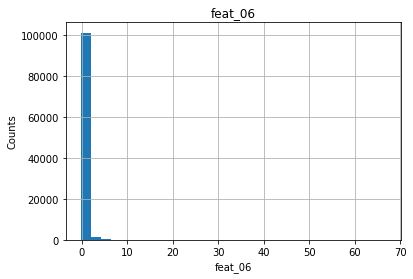

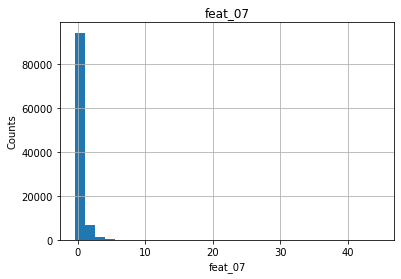

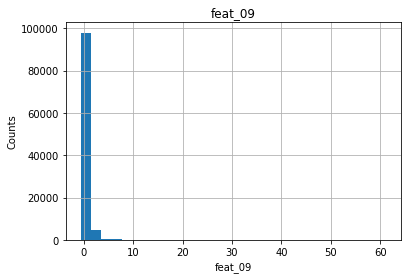

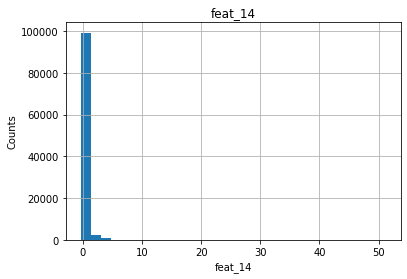

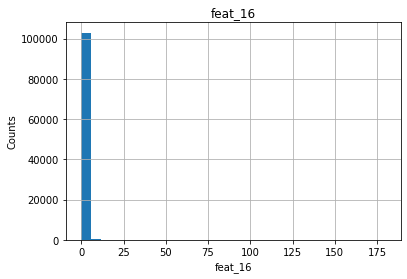

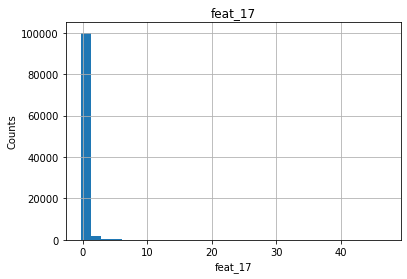

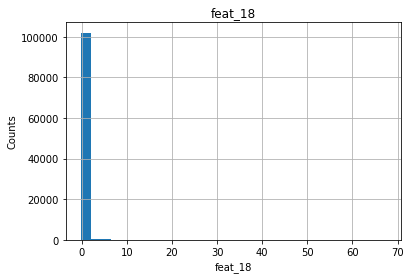

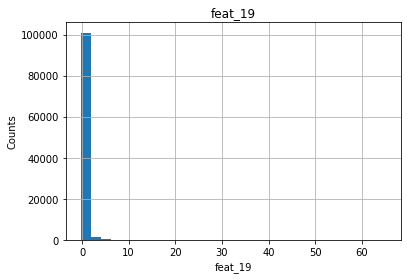

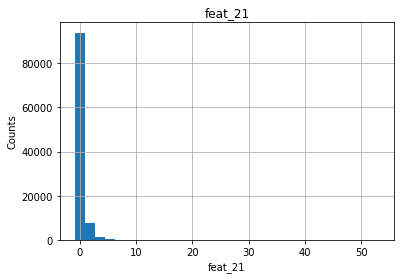

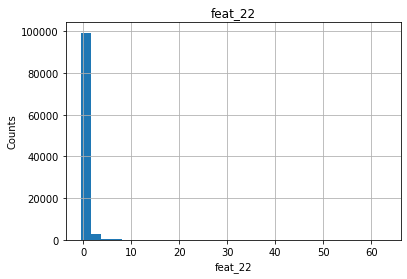

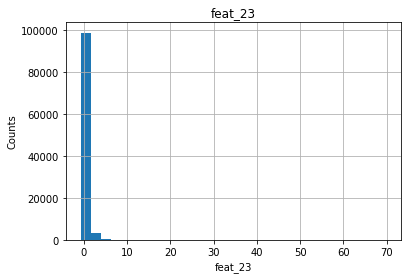

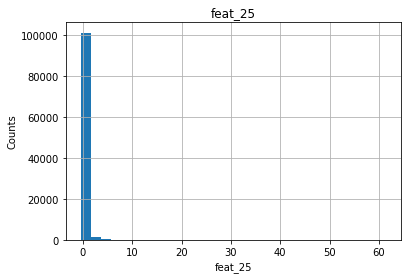

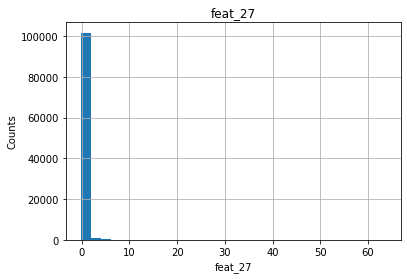

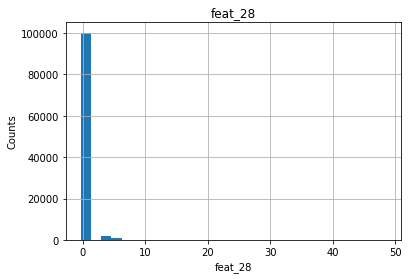

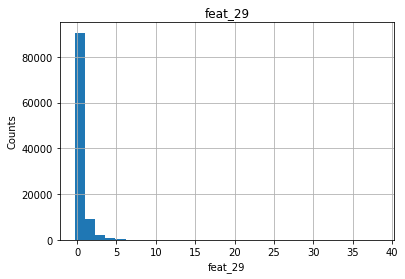

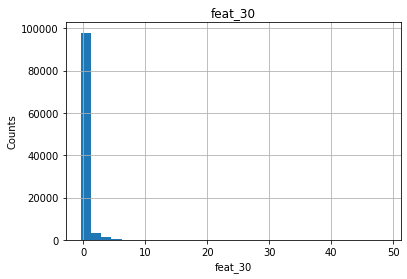

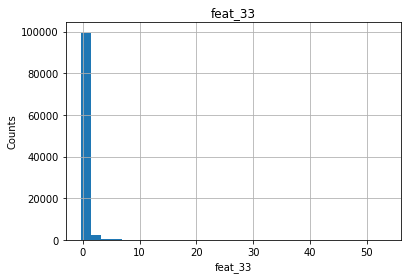

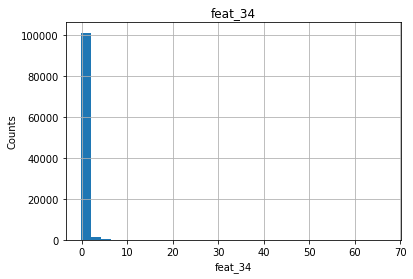

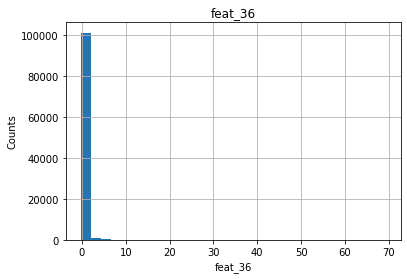

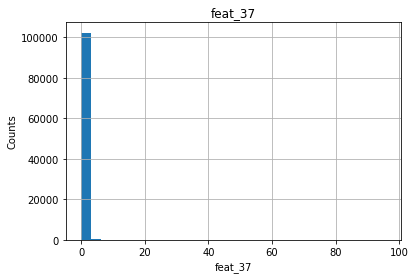

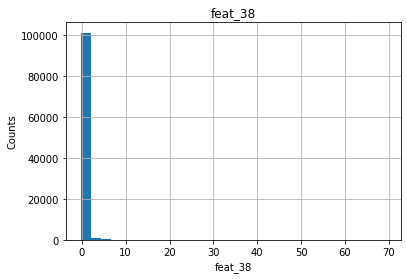

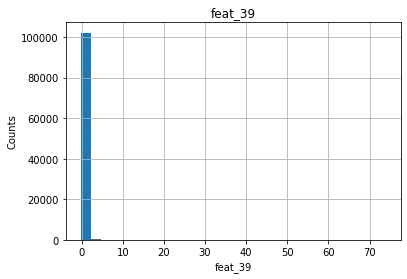

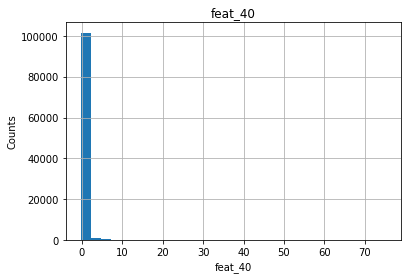

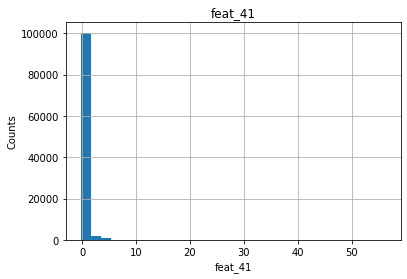

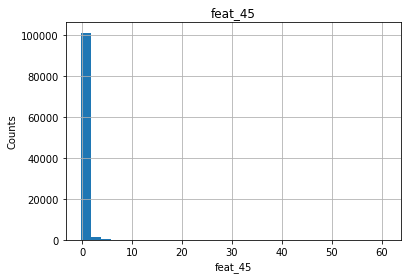

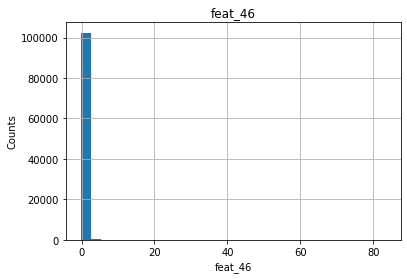

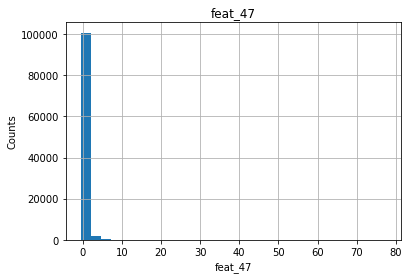

In [67]:
def test_standard_scaler(df,var):
    df2 = df.copy()
    
    # create scaler
    scaler = StandardScaler()

    #  fit  the scaler to the train set
    scaler.fit(df2[var].to_numpy().reshape(-1,1)) 

    # transform the train and test set
    df2[var] = scaler.transform(df2[var].to_numpy().reshape(-1,1))

    df2[var].hist(bins=30)
    plt.ylabel('Counts')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in continuous_vars:
    if var == target_name:
        continue
    test_standard_scaler(df,var)

No transform can be applied successfuly for the moment. We will just transform the target.

## 6. Outliers

We already observed the distributions of the continuous variables where we can observe some outliers:
* at the target variable

Let's inspect those with boxplots

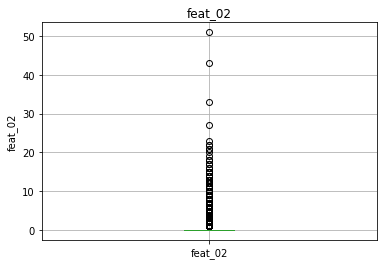

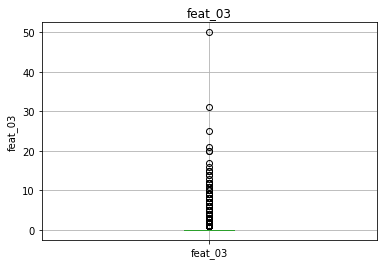

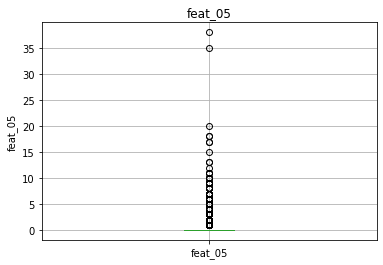

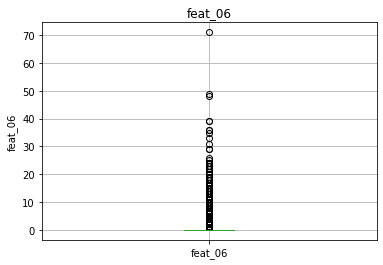

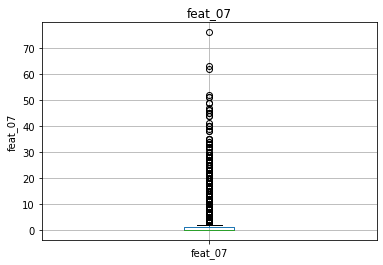

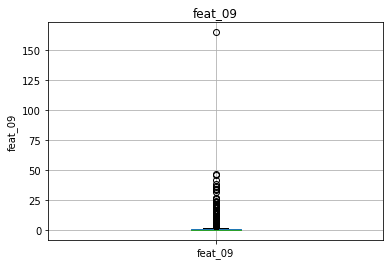

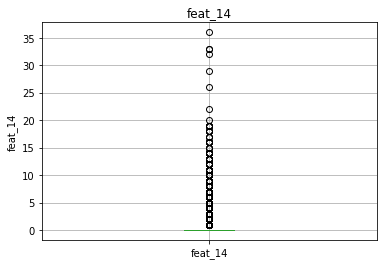

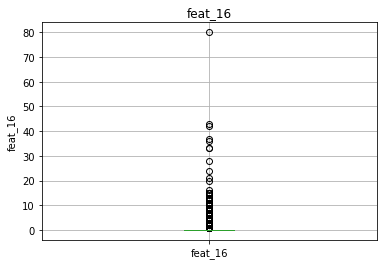

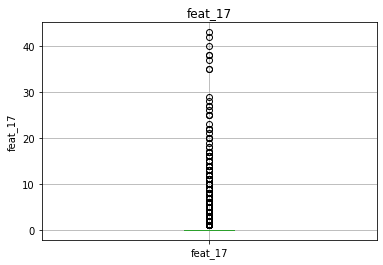

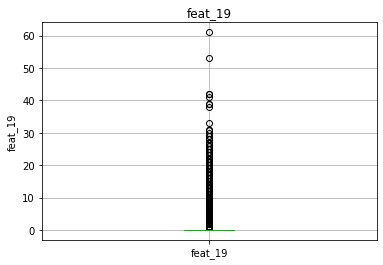

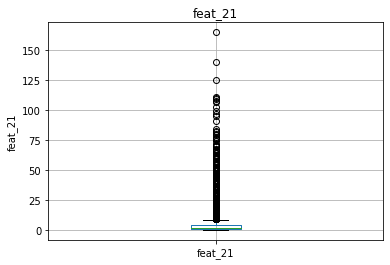

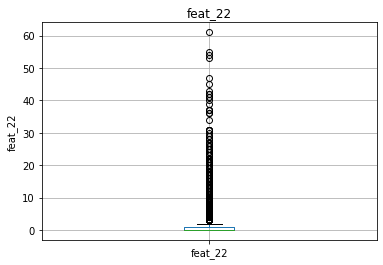

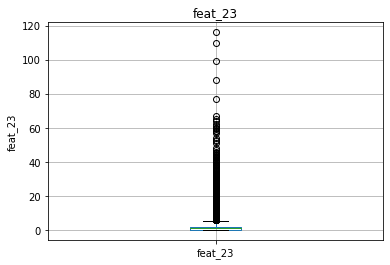

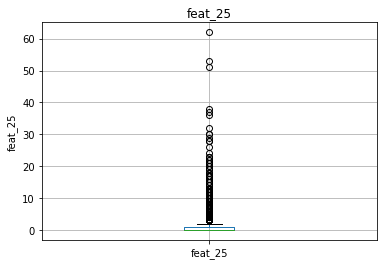

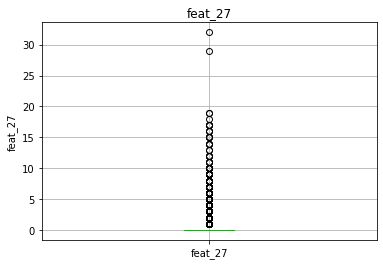

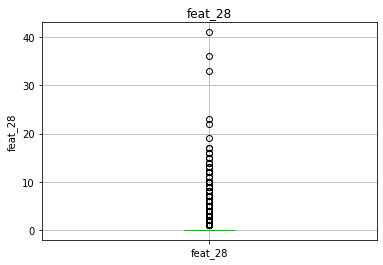

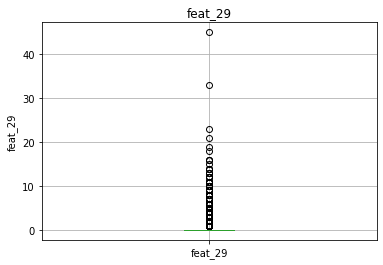

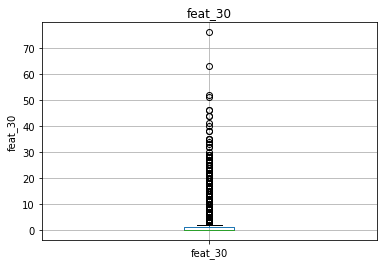

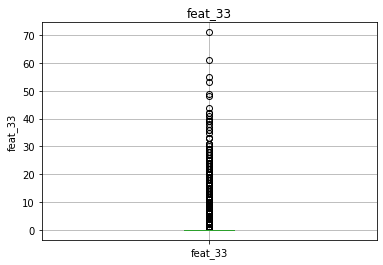

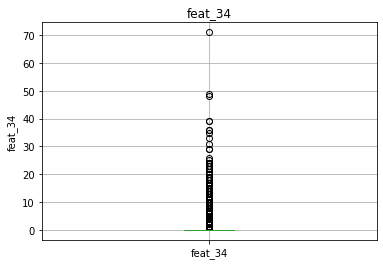

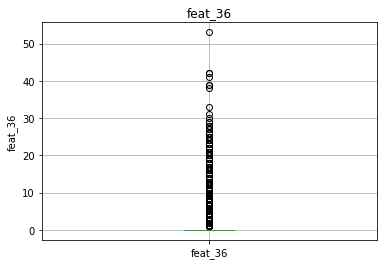

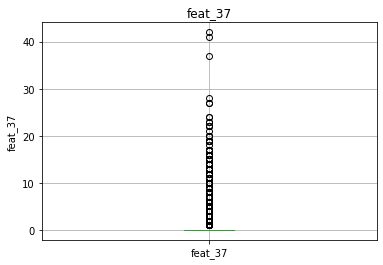

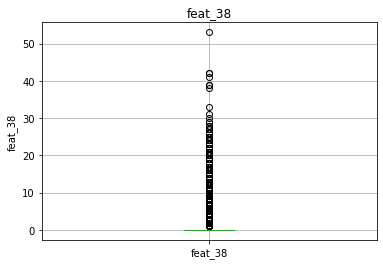

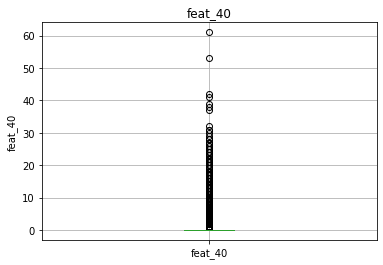

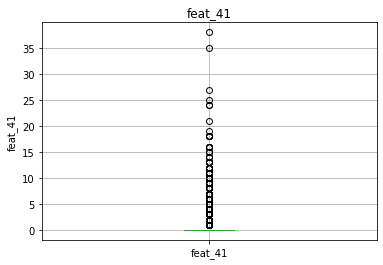

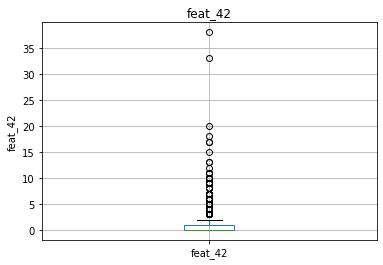

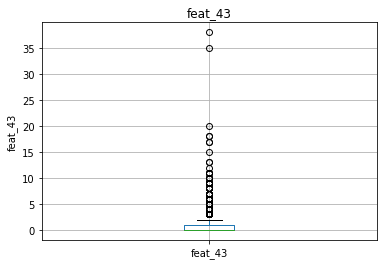

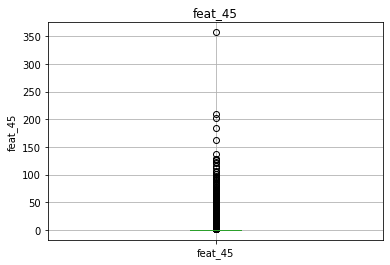

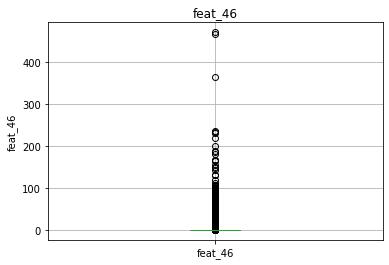

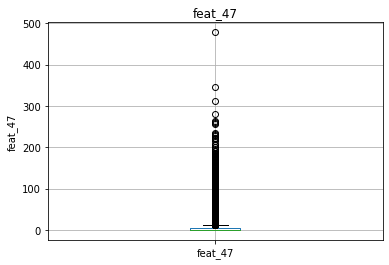

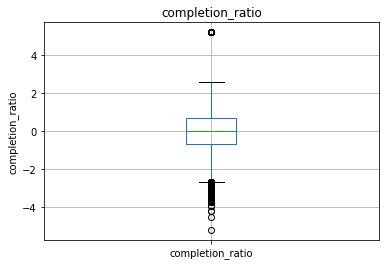

In [134]:
def find_outliers(df, var):
    df = df.copy()

    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in continuous_vars:
    find_outliers(df, var)

We will need to remove the outliers on the target.

In [136]:
lower_limit = df[target_name].quantile(0.001)
upper_limit = df[target_name].quantile(0.999)
df[target_name+'_cap'] = np.where(
    df[target_name]> upper_limit, upper_limit,
    np.where(df[target_name]< lower_limit, lower_limit,
    df[target_name])
)

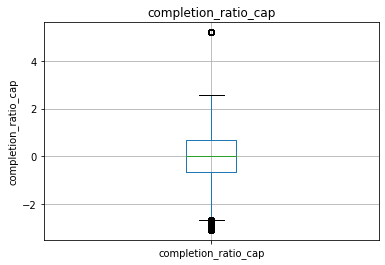

In [137]:
var = target_name+'_cap'
df.boxplot(column=var)
plt.title(var)
plt.ylabel(var)
plt.show()

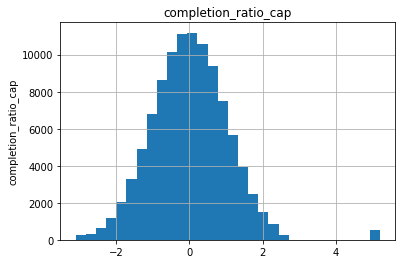

In [138]:

df.hist(column=var, bins=30)
plt.title(var)
plt.ylabel(var)
plt.show()

There are some outliers in the transformed target, and the original distribution didn't seem to have any so we conclude there are no outliers. The conclusion is that there are no outliers.

In [156]:
df.drop(columns=[target_name+'_cap'], inplace=True)

## 7. Correlation

Let's detect if there are correlated features that can harm the machine learning model performance.

In [157]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


d = df

# Compute the correlation matrix
corr = d.corr()

<AxesSubplot:>

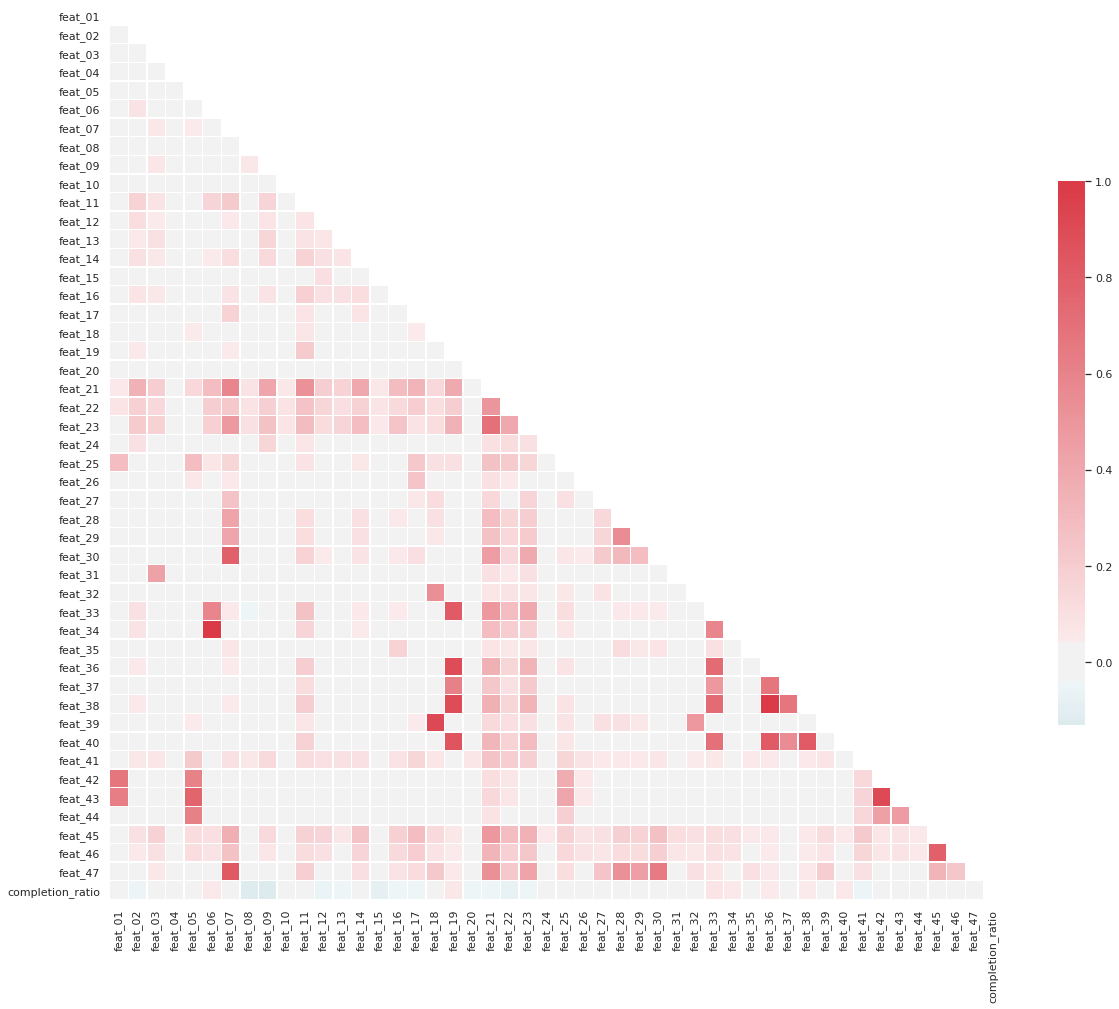

In [162]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [159]:
print("Correlation between target and features")
corr = d.corr()
print(corr['completion_ratio'].sort_values())
corr

Correlation between target and features
feat_09            -0.129885
feat_08            -0.120450
feat_15            -0.078317
feat_22            -0.074939
feat_12            -0.057148
feat_41            -0.049586
feat_02            -0.048000
feat_23            -0.043851
feat_13            -0.043102
feat_20            -0.042283
feat_21            -0.042109
feat_16            -0.040133
feat_17            -0.039797
feat_24            -0.028993
feat_10            -0.023908
feat_44            -0.022630
feat_03            -0.017600
feat_26            -0.017172
feat_04            -0.014995
feat_11            -0.014904
feat_35            -0.014477
feat_39            -0.011446
feat_25            -0.009470
feat_18            -0.007374
feat_32            -0.006798
feat_31            -0.006325
feat_45            -0.005435
feat_01            -0.004132
feat_28            -0.003558
feat_29            -0.002870
feat_42            -0.002485
feat_46            -0.002293
feat_14            -0.002156
fea

,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,feat_08,feat_09,feat_10,...,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,completion_ratio
feat_01,1.000000,-0.019570,-0.007375,0.001320,-0.025173,-0.004021,-0.020863,-0.021308,-0.025514,-0.001787,...,-0.008929,-0.005141,0.000525,0.669004,0.630667,-0.009546,-0.016847,-0.011104,-0.017991,-0.004132
feat_02,-0.019570,1.000000,0.015996,-0.006019,-0.024083,0.080888,0.038627,-0.009074,0.021396,-0.005135,...,-0.005449,0.040756,0.062967,-0.028356,-0.031602,-0.015168,0.100829,0.052312,0.039397,-0.048000
feat_03,-0.007375,0.015996,1.000000,0.003157,0.010128,0.001571,0.055768,0.011865,0.069478,0.007964,...,0.027884,0.009958,0.068835,-0.000433,0.003021,0.007899,0.177308,0.098311,0.057834,-0.017600
feat_04,0.001320,-0.006019,0.003157,1.000000,0.000185,-0.004490,-0.004630,0.003521,0.002020,0.006023,...,-0.000245,-0.005598,0.007461,0.001546,0.001028,0.001740,-0.000069,0.000304,-0.002783,-0.014995
feat_05,-0.025173,-0.024083,0.010128,0.000185,1.000000,-0.012264,0.046192,0.017907,-0.015732,0.007495,...,0.042778,0.001732,0.212413,0.603903,0.759081,0.613203,0.122764,0.114711,0.039433,0.006311
feat_06,-0.004021,0.080888,0.001571,-0.004490,-0.012264,1.000000,0.003413,-0.029743,-0.009788,-0.001552,...,0.017175,0.020245,0.041285,-0.010755,-0.012341,-0.006414,0.105628,0.081596,0.015857,0.054952
feat_07,-0.020863,0.038627,0.055768,-0.004630,0.046192,0.003413,1.000000,-0.010072,0.039608,0.007784,...,0.017293,0.028159,0.103698,0.011087,0.021914,0.029767,0.368758,0.264380,0.825013,0.034859
feat_08,-0.021308,-0.009074,0.011865,0.003521,0.017907,-0.029743,-0.010072,1.000000,0.059639,0.019489,...,-0.000730,-0.029491,0.063763,-0.006063,0.000253,0.012348,0.029501,0.025120,-0.011385,-0.120450
feat_09,-0.025514,0.021396,0.069478,0.002020,-0.015732,-0.009788,0.039608,0.059639,1.000000,0.034672,...,-0.007966,-0.019078,0.128225,-0.026418,-0.028695,-0.000878,0.127133,0.068640,0.035478,-0.129885
feat_10,-0.001787,-0.005135,0.007964,0.006023,0.007495,-0.001552,0.007784,0.019489,0.034672,1.000000,...,0.003316,-0.003950,0.022116,0.003170,0.004744,0.003627,0.031275,0.016421,0.005842,-0.023908


In [160]:
flattenned_list = []
for col in corr.columns:
    #print(col)
    flattenned_list.extend([ c for c in corr[col].sort_values(ascending=False) if c!=1.0])
flattenned_list.sort()
flattenned_list[-10:]

[0.8995766754029026,
 0.8995766754029026,
 0.8997439616634129,
 0.8997439616634129,
 0.9038376288714971,
 0.9038376288714971,
 0.9138336189227102,
 0.9138336189227102,
 0.9989624770771555,
 0.9989624770771555]

In [163]:
print("Correlation between features")
corr = d.corr()
# construct pairs (corr, (feat, feat)) and then sort them
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 20))


Correlation between features
Top Absolute Correlations
feat_06  feat_34    1.000000
feat_36  feat_38    0.998962
feat_18  feat_39    0.913834
feat_42  feat_43    0.903838
feat_19  feat_36    0.899744
         feat_38    0.899577
         feat_40    0.856615
feat_07  feat_47    0.825013
feat_38  feat_40    0.812107
feat_19  feat_33    0.812081
feat_36  feat_40    0.811637
feat_45  feat_46    0.796881
feat_07  feat_30    0.783142
feat_05  feat_43    0.759081
feat_33  feat_36    0.734346
         feat_38    0.734239
feat_21  feat_23    0.697818
feat_33  feat_40    0.697311
feat_37  feat_38    0.675891
feat_36  feat_37    0.675625
dtype: float64


Let's see some scatter plots of the more correlated vars

1031


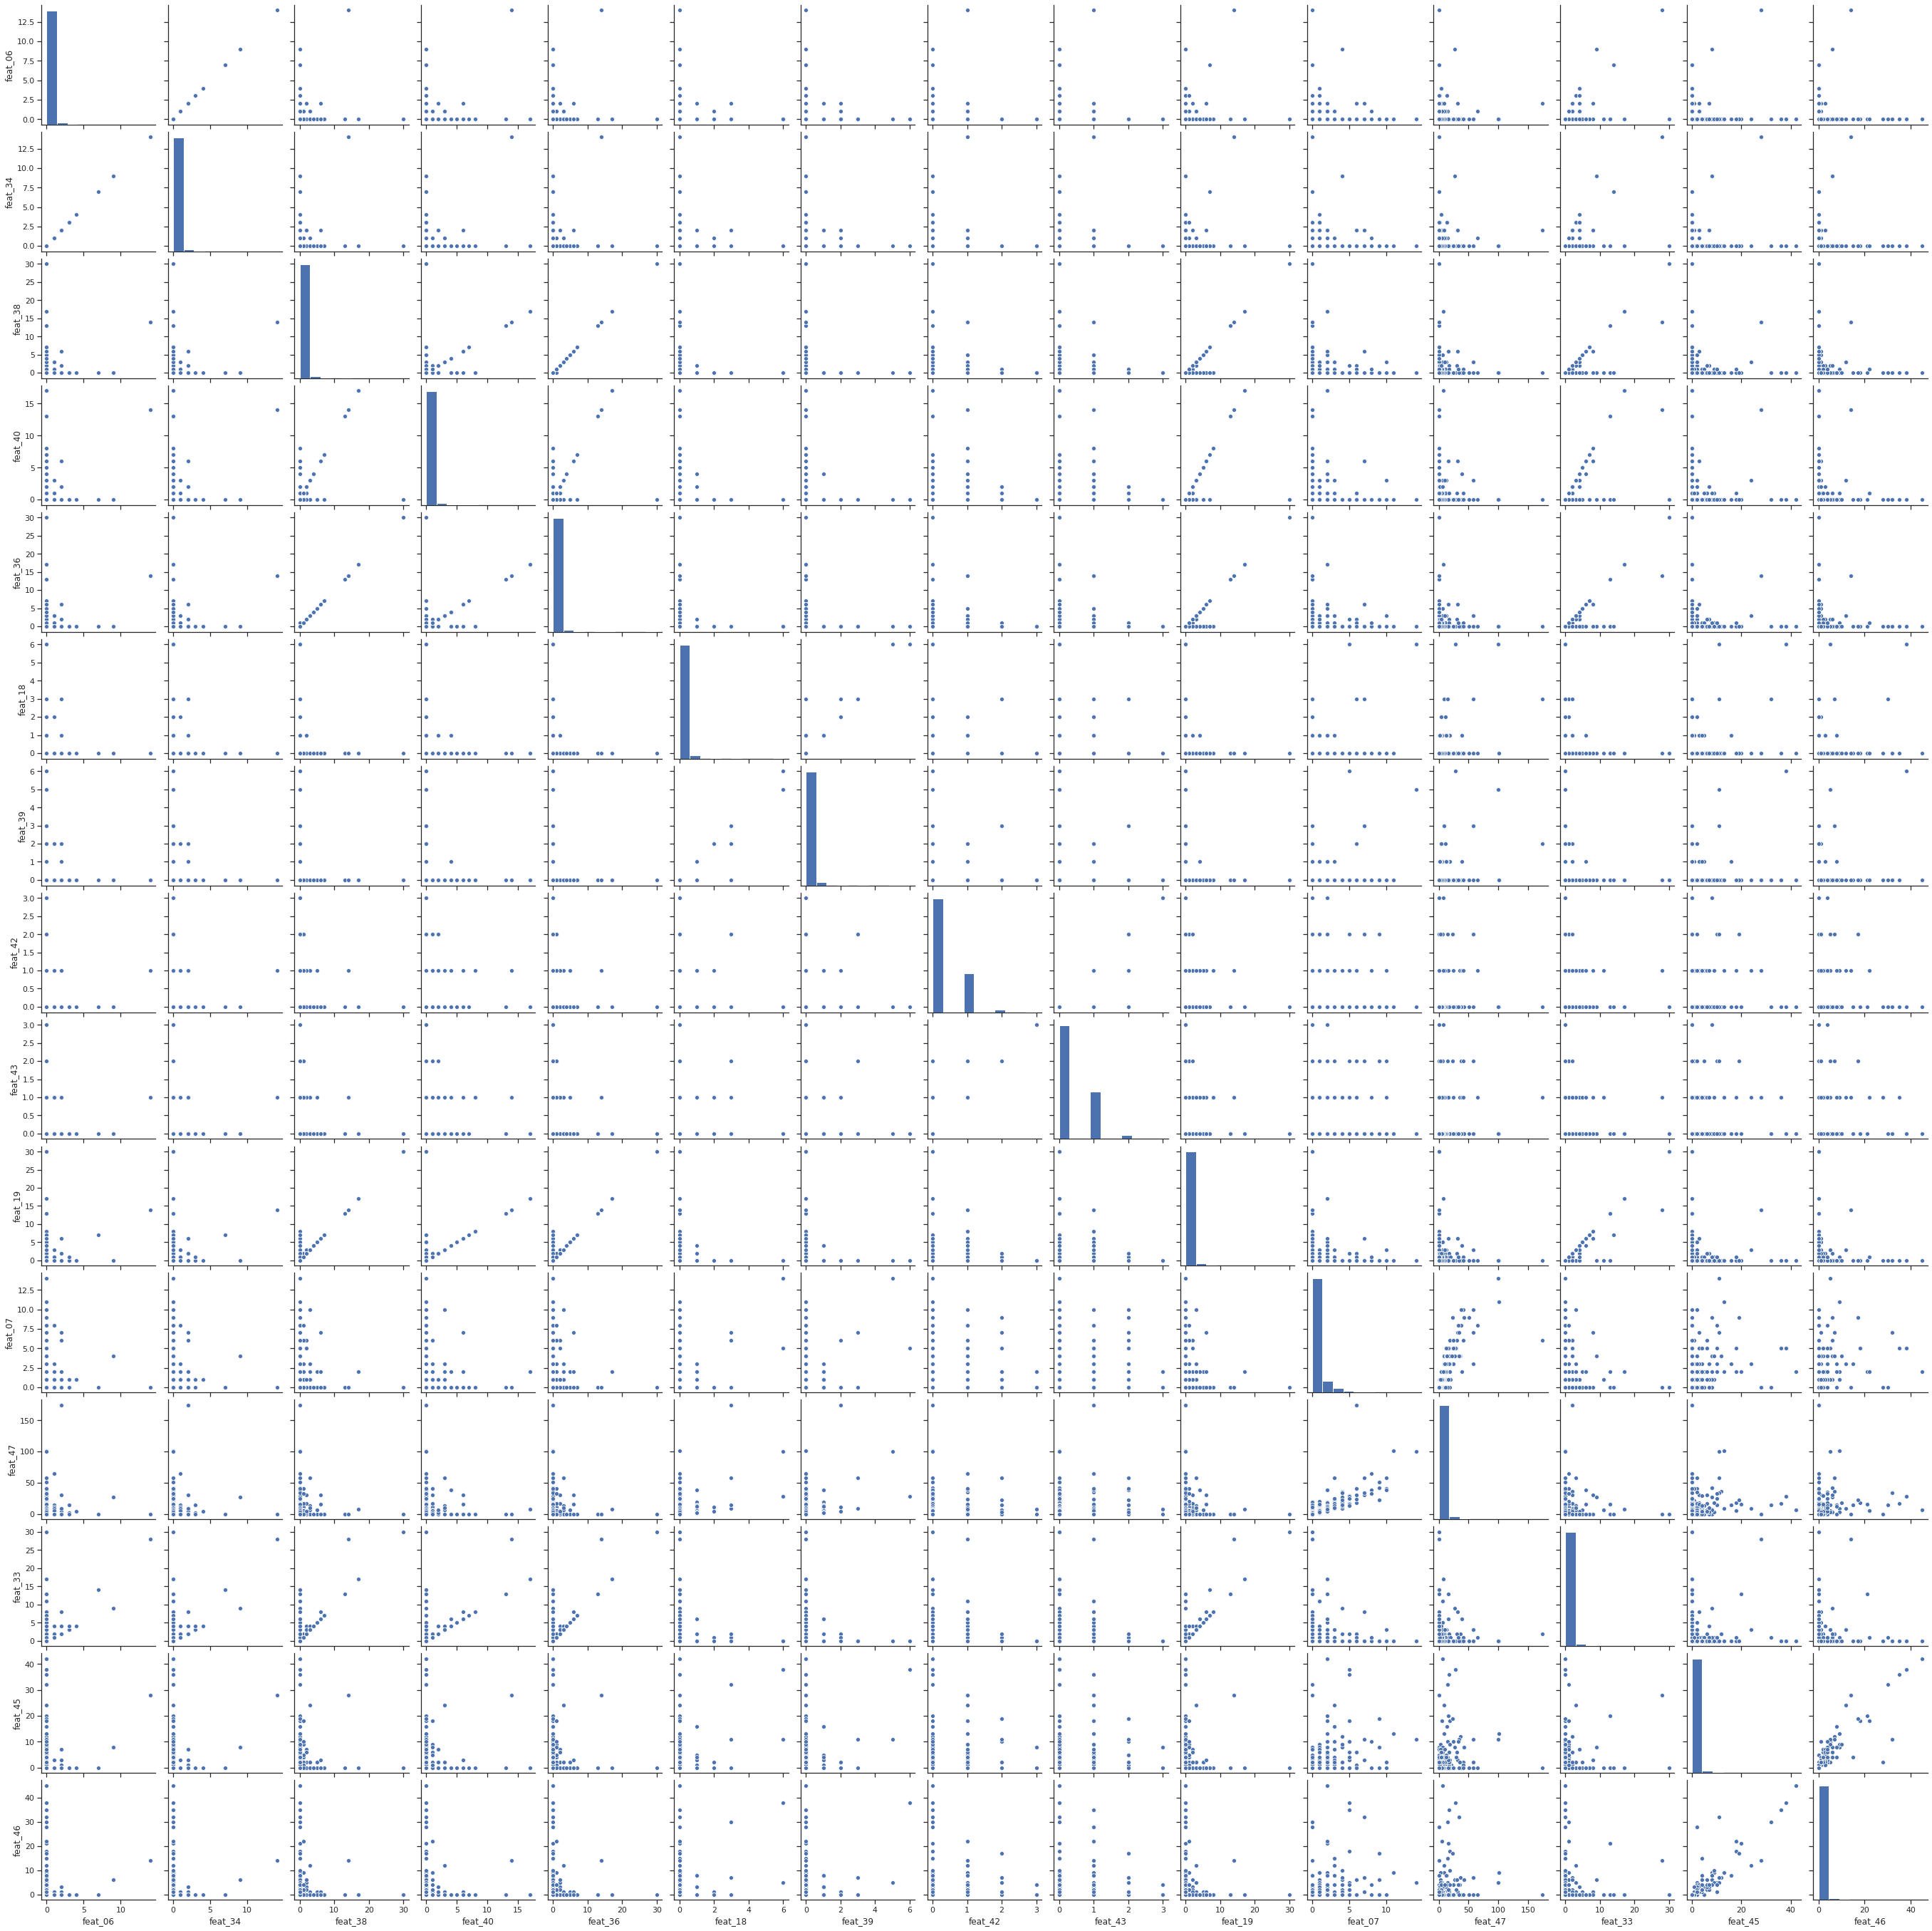

In [164]:

df = df_original.loc[:,[ 
    'feat_06', 'feat_34', 
    'feat_38', 'feat_40',  
    'feat_36', 'feat_18', 
    'feat_39', 'feat_42',
    'feat_43', 'feat_19',
    'feat_07', 'feat_47',
    'feat_33', 'feat_45',
    'feat_46'
]]
df = df.sample(frac=0.001)
print(len(df))
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(data=df)

We can conclude about correlation that:

The highly correlated features are:
* feat_06  feat_34    1.000000
* feat_36  feat_38    0.998962
* feat_18  feat_39    0.913834
* feat_42  feat_43    0.903838
* feat_19  feat_36    0.899744
* feat_19  feat_38    0.899577
* feat_19  feat_40    0.856615
* feat_07  feat_47    0.825013
* feat_38  feat_40    0.812107
* feat_19  feat_33    0.812081
* feat_36  feat_40    0.811637
* feat_45  feat_46    0.796881

The features that are more correlated with the target are (but we observe they are not very correlated): 
* feat_09            -0.129885
* feat_08            -0.120450
* feat_15            -0.078317
* feat_22            -0.074939
* feat_19             0.056600
* feat_33             0.075896

The features showing possible outliers are : 
* we found some outliers in the transformed target, and the original distribution didn't seem to have any so we conclude there are no outliers
